#Data collection and Extraction

In [ ]:
pip install mwclient

In [ ]:
import mwclient
import time

site = mwclient.Site('en.wikipedia.org')
page = site.pages['Binance']

In [ ]:

# Retrieve the revisions of the page
revs = list(page.revisions())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 1219134145),
             ('parentid', 1219133622),
             ('user', 'Nnev66'),
             ('timestamp',
              time.struct_time(tm_year=2024, tm_mon=4, tm_mday=15, tm_hour=23, tm_min=39, tm_sec=48, tm_wday=0, tm_yday=106, tm_isdst=-1)),
             ('comment',
              'Undid revision [[Special:Diff/1219133622|1219133622]] by [[Special:Contributions/Nnev66|Nnev66]] ([[User talk:Nnev66|talk]]) moving references back to Infobox as before as some details are only in box and references will still be out of order with respect to article (which I was trying to fix)')])

In [ ]:
revs = sorted(revs, key=lambda rev: rev['timestamp'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 817963944),
             ('parentid', 0),
             ('user', 'El fo0'),
             ('timestamp',
              time.struct_time(tm_year=2017, tm_mon=12, tm_mday=31, tm_hour=17, tm_min=7, tm_sec=33, tm_wday=6, tm_yday=365, tm_isdst=-1)),
             ('comment',
              "[[WP:AES|←]]Created page with '{{Infobox company | name = Binance | foundation = 2016 | location = [[Hong Kong]], China | products = [[Cryptocurrency exchange]] | homepage = [https://www.binan...'")])

#Sentiment Analysis

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

def find_sentiment(text):
    sent = sentiment_pipeline([text[:250]])[0]
    score = sent['score']
    if sent['label'] == 'NEGATIVE':
        score *= -1
    return score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)):
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-u

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
edits = {}

for rev in revs:
    date = time.strftime('%Y-%m-%d', rev['timestamp'])

    if date not in edits:
        edits[date] = {'sentiments': [], 'edit_count': 0}

    edits[date]['edit_count'] += 1

    comment = rev['comment']
    edits[date]['sentiments'].append(find_sentiment(comment))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#This line calculates the proportion of negative sentiments for the current date. It counts the number of negative sentiment scores (scores less than 0) and divides it by the total number of sentiment scores for that date.

In [ ]:
from statistics import mean

for key in edits:
    if len(edits[key]['sentiments']) > 0:
        edits[key]['sentiment'] = mean(edits[key]['sentiments'])
        edits[key]['neg_sentiment'] =  len([s for s in edits[key]['sentiments'] if s<0])/ len(edits[key]['sentiments'])
    else:
        edits[key]['sentiment'] = 0
        edits[key]['neg_sentiment'] = 0
    del edits[key]['sentiments']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'2017-12-31': {'edit_count': 4,
  'sentiment': 0.3151090741157532,
  'neg_sentiment': 0.25},
 '2018-01-04': {'edit_count': 1,
  'sentiment': -0.9983586668968201,
  'neg_sentiment': 1.0},
 '2018-01-15': {'edit_count': 1,
  'sentiment': -0.9979482293128967,
  'neg_sentiment': 1.0},
 '2018-01-21': {'edit_count': 1,
  'sentiment': -0.9997220635414124,
  'neg_sentiment': 1.0},
 '2018-01-22': {'edit_count': 1,
  'sentiment': -0.9997299313545227,
  'neg_sentiment': 1.0},
 '2018-02-09': {'edit_count': 2,
  'sentiment': -0.07484185695648193,
  'neg_sentiment': 0.5},
 '2018-02-13': {'edit_count': 4,
  'sentiment': 0.025795340538024902,
  'neg_sentiment': 0.5},
 '2018-02-15': {'edit_count': 1,
  'sentiment': 0.7481208443641663,
  'neg_sentiment': 0.0},
 '2018-03-08': {'edit_count': 2,
  'sentiment': 0.7481208443641663,
  'neg_sentiment': 0.0},
 '2018-03-15': {'edit_count': 15,
  'sentiment': 0.06540501515070597,
  'neg_sentiment': 0.4666666666666667},
 '2018-03-19': {'edit_count': 1,
  'sentimen

#Data preprocessing

#replacing the data into dataframe

In [ ]:
import pandas as pd

edits_df = pd.DataFrame.from_dict(edits, orient='index')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2017-12-31,4,0.315109,0.250000
2018-01-04,1,-0.998359,1.000000
2018-01-15,1,-0.997948,1.000000
2018-01-21,1,-0.999722,1.000000
2018-01-22,1,-0.999730,1.000000
...,...,...,...
2024-03-24,2,0.748121,0.000000
2024-03-25,3,0.271739,0.333333
2024-04-09,2,0.870391,0.000000
2024-04-12,1,0.654447,0.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='edit_count', ylabel='sentiment'>

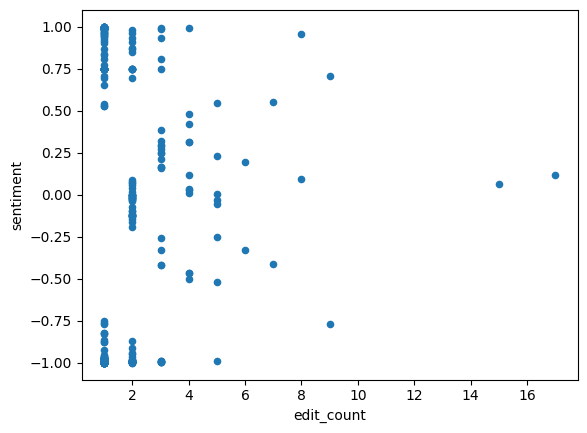

In [ ]:
# @title Correlation between edit count and sentiment

edits_df.plot.scatter(x='edit_count', y='sentiment')

In [ ]:
edits_df.index = pd.to_datetime(edits_df.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from datetime import datetime, timedelta
import pandas as pd

start_date = '2017-12-31'
end_date = datetime.today()

dates = pd.date_range(start=start_date, end=end_date)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2017-12-31', '2018-01-01', '2018-01-02', '2018-01-03',
               '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07',
               '2018-01-08', '2018-01-09',
               ...
               '2024-04-12', '2024-04-13', '2024-04-14', '2024-04-15',
               '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
               '2024-04-20', '2024-04-21'],
              dtype='datetime64[ns]', length=2304, freq='D')

#Merging the data which was missing

In [ ]:
edits_df = edits_df.reindex(dates,fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Merging the data which was missing

In [ ]:
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2017-12-31,4,0.315109,0.25
2018-01-01,0,0.000000,0.00
2018-01-02,0,0.000000,0.00
2018-01-03,0,0.000000,0.00
2018-01-04,1,-0.998359,1.00
...,...,...,...
2024-04-17,0,0.000000,0.00
2024-04-18,0,0.000000,0.00
2024-04-19,0,0.000000,0.00
2024-04-20,0,0.000000,0.00


# creating Rolling windows

In [ ]:
rolling_edits = edits_df.rolling(30).mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#creating Rolling windows

In [ ]:
rolling_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2017-12-31,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN
...,...,...,...
2024-04-17,0.533333,0.136837,0.061111
2024-04-18,0.500000,0.111899,0.061111
2024-04-19,0.400000,0.144968,0.027778
2024-04-20,0.366667,0.117955,0.027778


In [ ]:
rolling_edits = rolling_edits.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits.to_csv('wikipedia_edits.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


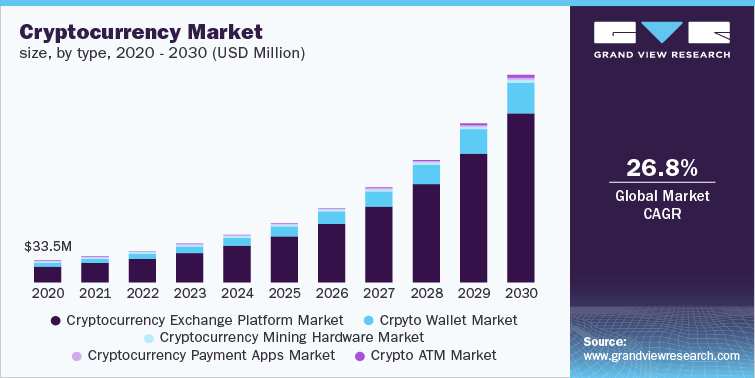

In [ ]:
import yfinance as yf
import os
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb_ticker = yf.Ticker('BNB-USD')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb = bnb_ticker.history(period='max')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,2.053140,2.174230,1.893940,1.990770,19192200,0.0,0.0
2017-11-10 00:00:00+00:00,2.007730,2.069470,1.644780,1.796840,11155000,0.0,0.0
2017-11-11 00:00:00+00:00,1.786280,1.917750,1.614290,1.670470,8178150,0.0,0.0
2017-11-12 00:00:00+00:00,1.668890,1.672800,1.462560,1.519690,15298700,0.0,0.0
2017-11-13 00:00:00+00:00,1.526010,1.735020,1.517600,1.686620,12238800,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-17 00:00:00+00:00,537.831360,548.042847,514.112854,534.416016,1411927485,0.0,0.0
2024-04-18 00:00:00+00:00,534.414978,555.040039,527.430054,552.172119,1439312699,0.0,0.0
2024-04-19 00:00:00+00:00,552.172119,564.544861,525.028625,554.889282,1320094794,0.0,0.0


In [ ]:
bnb.index = pd.to_datetime(bnb.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#deleting the dividends and stock splits

In [ ]:
del bnb['Dividends']
del bnb['Stock Splits']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb.columns = [c.lower() for c in bnb.columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Data visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Date'>

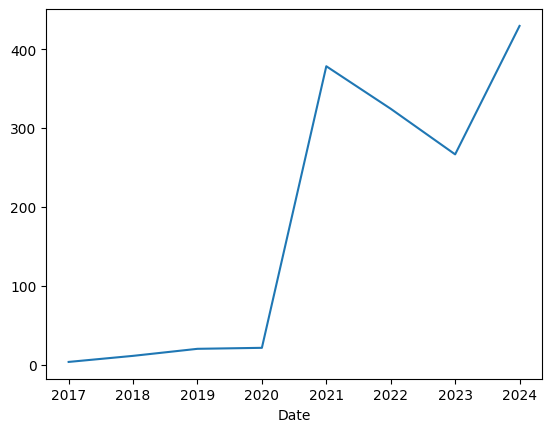

In [ ]:
# prompt: just want to visualize at what price of money does the close column is inflenecd yearly

yearly_close = bnb.groupby(bnb.index.year)['close'].mean()
yearly_close.plot()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Date'>

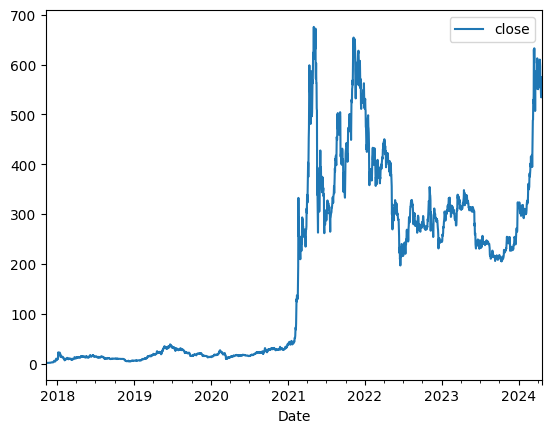

In [ ]:
bnb.plot.line(y='close', use_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


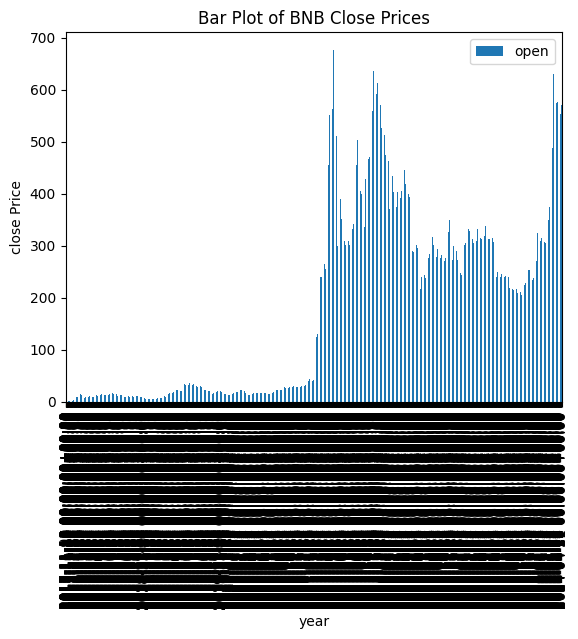

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'bnb' with a 'Close' column
bnb.plot.bar(y='open', use_index=True)
plt.xlabel('year')
plt.ylabel('close Price')
plt.title('Bar Plot of BNB Close Prices')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


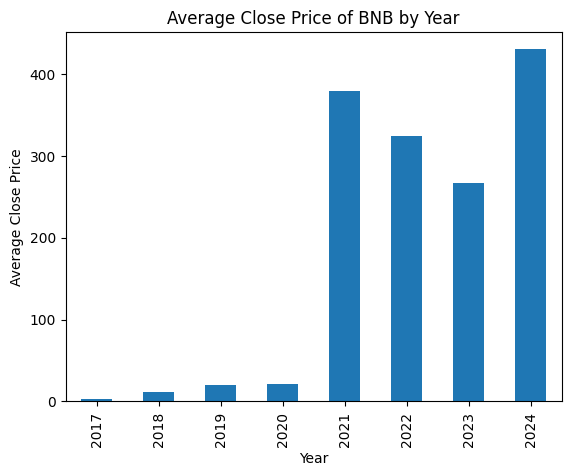

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'bnb' with a 'Close' column
bnb_yearly = bnb.resample('Y').mean()  # Resample data to yearly frequency and calculate mean
years = bnb_yearly.index.year  # Extract years from the index

# Plot the data using a bar plot
bnb_yearly.plot.bar(y='close', legend=None)
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Average Close Price of BNB by Year')

# Set x-axis tick labels to be the years
plt.xticks(range(len(years)), years)

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


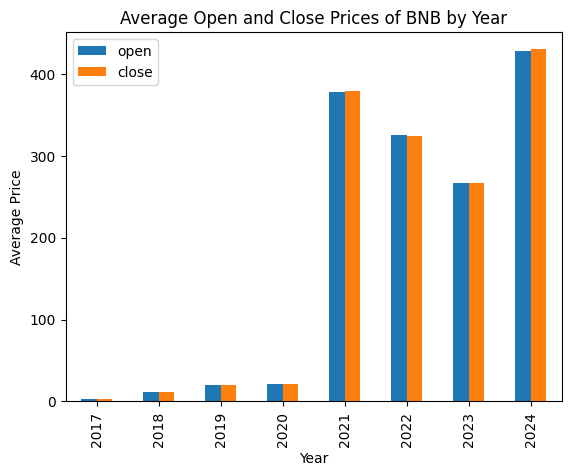

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'bnb' with 'Open' and 'Close' columns
bnb_yearly = bnb.resample('Y').mean()  # Resample data to yearly frequency and calculate mean
years = bnb_yearly.index.year  # Extract years from the index

# Plot the data using a bar plot
bnb_yearly.plot.bar(y=['open', 'close'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Open and Close Prices of BNB by Year')

# Set x-axis tick labels to be the years
plt.xticks(range(len(years)), years)

plt.show()


#datetime conversion from tz localize to tz aware

In [ ]:
datetime_index = bnb.index

# Get the type of the datetime index
datetime_index_type = type(datetime_index)

# Check if the datetime index is timezone aware
is_tz_aware = datetime_index.tz is not None

# Print the datetime index, its type, and whether it's timezone aware
print("Datetime Index:", datetime_index)
print("Type of Datetime Index:", datetime_index_type)
print("Is timezone aware:", is_tz_aware)

Datetime Index: DatetimeIndex(['2017-11-09 00:00:00+00:00', '2017-11-10 00:00:00+00:00',
               '2017-11-11 00:00:00+00:00', '2017-11-12 00:00:00+00:00',
               '2017-11-13 00:00:00+00:00', '2017-11-14 00:00:00+00:00',
               '2017-11-15 00:00:00+00:00', '2017-11-16 00:00:00+00:00',
               '2017-11-17 00:00:00+00:00', '2017-11-18 00:00:00+00:00',
               ...
               '2024-04-12 00:00:00+00:00', '2024-04-13 00:00:00+00:00',
               '2024-04-14 00:00:00+00:00', '2024-04-15 00:00:00+00:00',
               '2024-04-16 00:00:00+00:00', '2024-04-17 00:00:00+00:00',
               '2024-04-18 00:00:00+00:00', '2024-04-19 00:00:00+00:00',
               '2024-04-20 00:00:00+00:00', '2024-04-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=2356, freq=None)
Type of Datetime Index: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Is timezone aware: True


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
wiki = pd.read_csv('/content/wikipedia_edits.csv', index_col=0, parse_dates=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
wiki

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2018-01-29,0.266667,-0.122688,0.141667
2018-01-30,0.133333,-0.133192,0.133333
2018-01-31,0.133333,-0.133192,0.133333
2018-02-01,0.133333,-0.133192,0.133333
2018-02-02,0.133333,-0.133192,0.133333
...,...,...,...
2024-04-17,0.533333,0.136837,0.061111
2024-04-18,0.500000,0.111899,0.061111
2024-04-19,0.400000,0.144968,0.027778
2024-04-20,0.366667,0.117955,0.027778


In [ ]:
import pandas as pd

# Assuming the DataFrame with the datetime index is named wiki

# Access the datetime index of the DataFrame wiki
datetime_index = wiki.index

# Get the type of the datetime index
datetime_index_type = type(datetime_index)

# Initialize a variable to store timezone awareness
is_tz_aware = False

# Try to check if the datetime index is timezone aware
try:
    is_tz_aware = datetime_index.tz is not None
except AttributeError:
    pass  # If AttributeError occurs, assume datetime index is not timezone aware

# Print the datetime index, its type, and whether it's timezone aware
print("Datetime Index:", datetime_index)
print("Type of Datetime Index:", datetime_index_type)
print("Is timezone aware:", is_tz_aware)


Datetime Index: DatetimeIndex(['2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07',
               ...
               '2024-04-12', '2024-04-13', '2024-04-14', '2024-04-15',
               '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
               '2024-04-20', '2024-04-21'],
              dtype='datetime64[ns]', length=2275, freq=None)
Type of Datetime Index: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Is timezone aware: False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Assuming the DataFrame with the datetime index is named wiki

# Access the datetime index of the DataFrame wiki
datetime_index = wiki.index

# Localize the datetime index to a specific timezone (e.g., 'UTC')
datetime_index_tz_aware = datetime_index.tz_localize('UTC')

# Get the type of the datetime index
datetime_index_type = type(datetime_index_tz_aware)

# Check if the datetime index is timezone aware after localization
is_tz_aware = datetime_index_tz_aware.tz is not None

# Print the datetime index, its type, and whether it's timezone aware
print("Datetime Index after localization:", datetime_index_tz_aware)
print("Type of Datetime Index:", datetime_index_type)
print("Is timezone aware after localization:", is_tz_aware)


Datetime Index after localization: DatetimeIndex(['2018-01-29 00:00:00+00:00', '2018-01-30 00:00:00+00:00',
               '2018-01-31 00:00:00+00:00', '2018-02-01 00:00:00+00:00',
               '2018-02-02 00:00:00+00:00', '2018-02-03 00:00:00+00:00',
               '2018-02-04 00:00:00+00:00', '2018-02-05 00:00:00+00:00',
               '2018-02-06 00:00:00+00:00', '2018-02-07 00:00:00+00:00',
               ...
               '2024-04-12 00:00:00+00:00', '2024-04-13 00:00:00+00:00',
               '2024-04-14 00:00:00+00:00', '2024-04-15 00:00:00+00:00',
               '2024-04-16 00:00:00+00:00', '2024-04-17 00:00:00+00:00',
               '2024-04-18 00:00:00+00:00', '2024-04-19 00:00:00+00:00',
               '2024-04-20 00:00:00+00:00', '2024-04-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=2275, freq=None)
Type of Datetime Index: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Is timezone aware after localization: True


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
wiki.index = wiki.index.tz_localize('UTC')

# Check if the datetime index is now timezone aware
is_tz_aware = wiki.index.tz is not None

# Print the result
print("Is timezone aware after conversion:", is_tz_aware)

Is timezone aware after conversion: True


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb = bnb.merge(wiki,left_index=True, right_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2018-01-29 00:00:00+00:00,13.545400,13.672700,12.677000,12.764500,71294304,0.266667,-0.122688,0.141667
2018-01-30 00:00:00+00:00,12.773600,12.773600,11.057100,11.250700,59389600,0.133333,-0.133192,0.133333
2018-01-31 00:00:00+00:00,11.268300,11.413200,10.568400,11.145000,50435000,0.133333,-0.133192,0.133333
2018-02-01 00:00:00+00:00,11.178300,11.394400,8.707420,9.515840,82984200,0.133333,-0.133192,0.133333
2018-02-02 00:00:00+00:00,9.407960,10.458500,7.218130,9.652290,91468200,0.133333,-0.133192,0.133333
...,...,...,...,...,...,...,...,...
2024-04-17 00:00:00+00:00,537.831360,548.042847,514.112854,534.416016,1411927485,0.533333,0.136837,0.061111
2024-04-18 00:00:00+00:00,534.414978,555.040039,527.430054,552.172119,1439312699,0.500000,0.111899,0.061111
2024-04-19 00:00:00+00:00,552.172119,564.544861,525.028625,554.889282,1320094794,0.400000,0.144968,0.027778
2024-04-20 00:00:00+00:00,554.888123,574.098694,549.800049,570.960510,697007137,0.366667,0.117955,0.027778


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


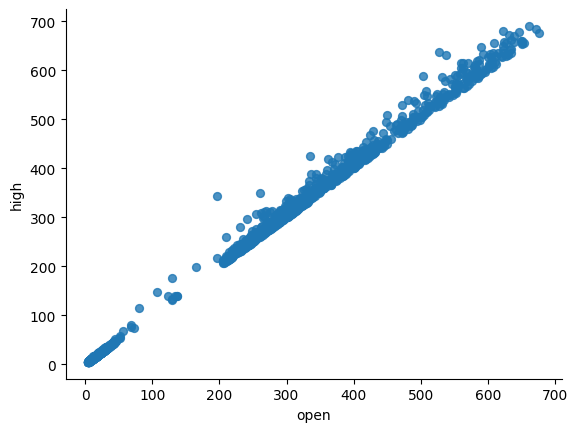

In [ ]:
# @title open vs high

from matplotlib import pyplot as plt
bnb.plot(kind='scatter', x='open', y='high', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
bnb['tomorrow']=bnb['close'].shift(-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2018-01-29 00:00:00+00:00,13.545400,13.672700,12.677000,12.764500,71294304,0.266667,-0.122688,0.141667,11.250700
2018-01-30 00:00:00+00:00,12.773600,12.773600,11.057100,11.250700,59389600,0.133333,-0.133192,0.133333,11.145000
2018-01-31 00:00:00+00:00,11.268300,11.413200,10.568400,11.145000,50435000,0.133333,-0.133192,0.133333,9.515840
2018-02-01 00:00:00+00:00,11.178300,11.394400,8.707420,9.515840,82984200,0.133333,-0.133192,0.133333,9.652290
2018-02-02 00:00:00+00:00,9.407960,10.458500,7.218130,9.652290,91468200,0.133333,-0.133192,0.133333,9.749680
...,...,...,...,...,...,...,...,...,...
2024-04-17 00:00:00+00:00,537.831360,548.042847,514.112854,534.416016,1411927485,0.533333,0.136837,0.061111,552.172119
2024-04-18 00:00:00+00:00,534.414978,555.040039,527.430054,552.172119,1439312699,0.500000,0.111899,0.061111,554.889282
2024-04-19 00:00:00+00:00,552.172119,564.544861,525.028625,554.889282,1320094794,0.400000,0.144968,0.027778,570.960510
2024-04-20 00:00:00+00:00,554.888123,574.098694,549.800049,570.960510,697007137,0.366667,0.117955,0.027778,574.604858


#open price

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


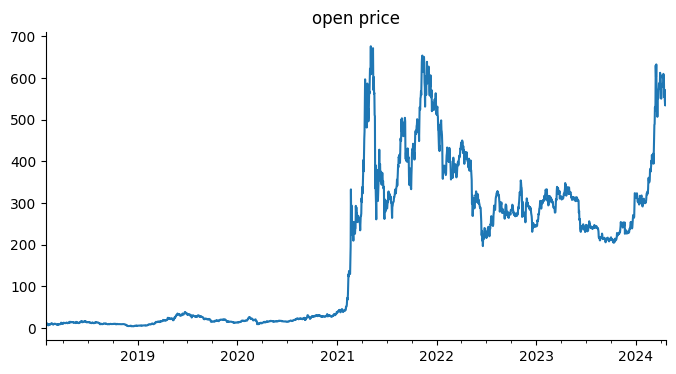

In [ ]:
# @title Open

from matplotlib import pyplot as plt
bnb['open'].plot(kind='line', figsize=(8, 4), title='open price')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


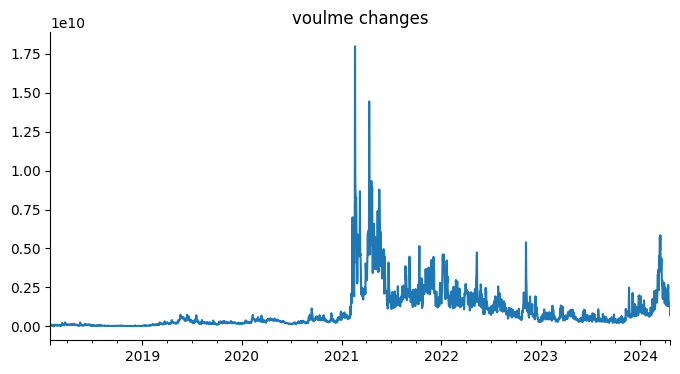

In [ ]:
from matplotlib import pyplot as plt
bnb['volume'].plot(kind='line', figsize=(8, 4), title='voulme changes')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


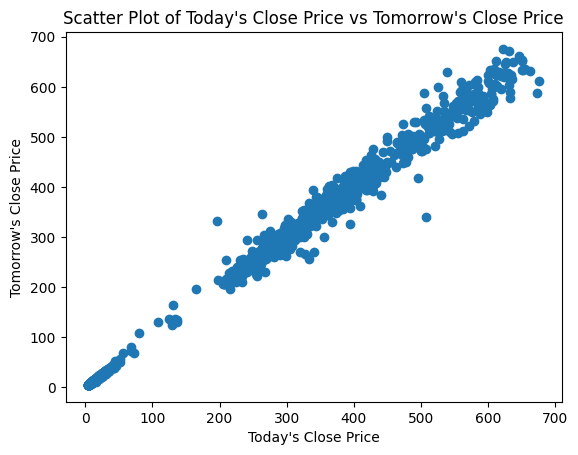

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'bnb' with a 'tomorrow' column
plt.scatter(bnb['close'], bnb['tomorrow'])
plt.xlabel("Today's Close Price")
plt.ylabel("Tomorrow's Close Price")
plt.title("Scatter Plot of Today's Close Price vs Tomorrow's Close Price")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


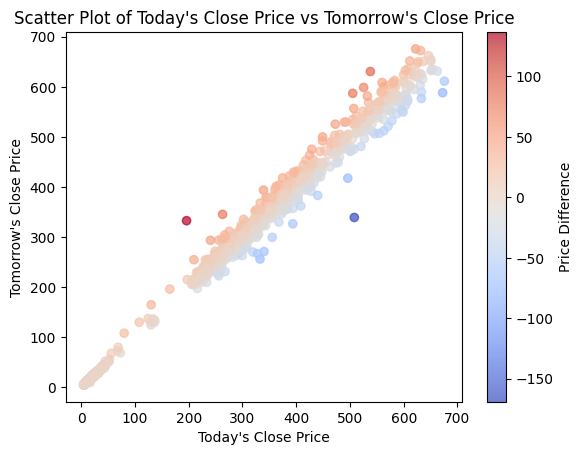

In [ ]:
import matplotlib.pyplot as plt

# Calculate the difference between tomorrow's close price and today's close price
bnb['Price_Difference'] = bnb['tomorrow'] - bnb['close']

# Plot the data using a scatter plot with conditional coloring
plt.scatter(bnb['close'], bnb['tomorrow'], c=bnb['Price_Difference'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Price Difference')
plt.xlabel("Today's Close Price")
plt.ylabel("Tomorrow's Close Price")
plt.title("Scatter Plot of Today's Close Price vs Tomorrow's Close Price")

plt.show()


#Blue markers represent positive differences (tomorrow's close price higher than today's close price).
#Red markers represent negative differences (tomorrow's close price lower than today's close price).

In [ ]:
import pandas as pd

# Calculate correlation matrix
correlation_matrix = bnb.corr()


print(correlation_matrix)


                      open      high       low     close    volume  \
open              1.000000  0.998888  0.998220  0.997657  0.646102   
high              0.998888  1.000000  0.997522  0.998835  0.667274   
low               0.998220  0.997522  1.000000  0.998698  0.624750   
close             0.997657  0.998835  0.998698  1.000000  0.651019   
volume            0.646102  0.667274  0.624750  0.651019  1.000000   
edit_count        0.195995  0.194814  0.196447  0.194918  0.047789   
sentiment        -0.115450 -0.114585 -0.120177 -0.117551 -0.035507   
neg_sentiment     0.354773  0.352345  0.358061  0.354472  0.118004   
tomorrow          0.995961  0.996828  0.996496  0.997675  0.651321   
Price_Difference -0.012773 -0.017359 -0.020216 -0.022040  0.000521   

                  edit_count  sentiment  neg_sentiment  tomorrow  \
open                0.195995  -0.115450       0.354773  0.995961   
high                0.194814  -0.114585       0.352345  0.996828   
low                 0.196

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


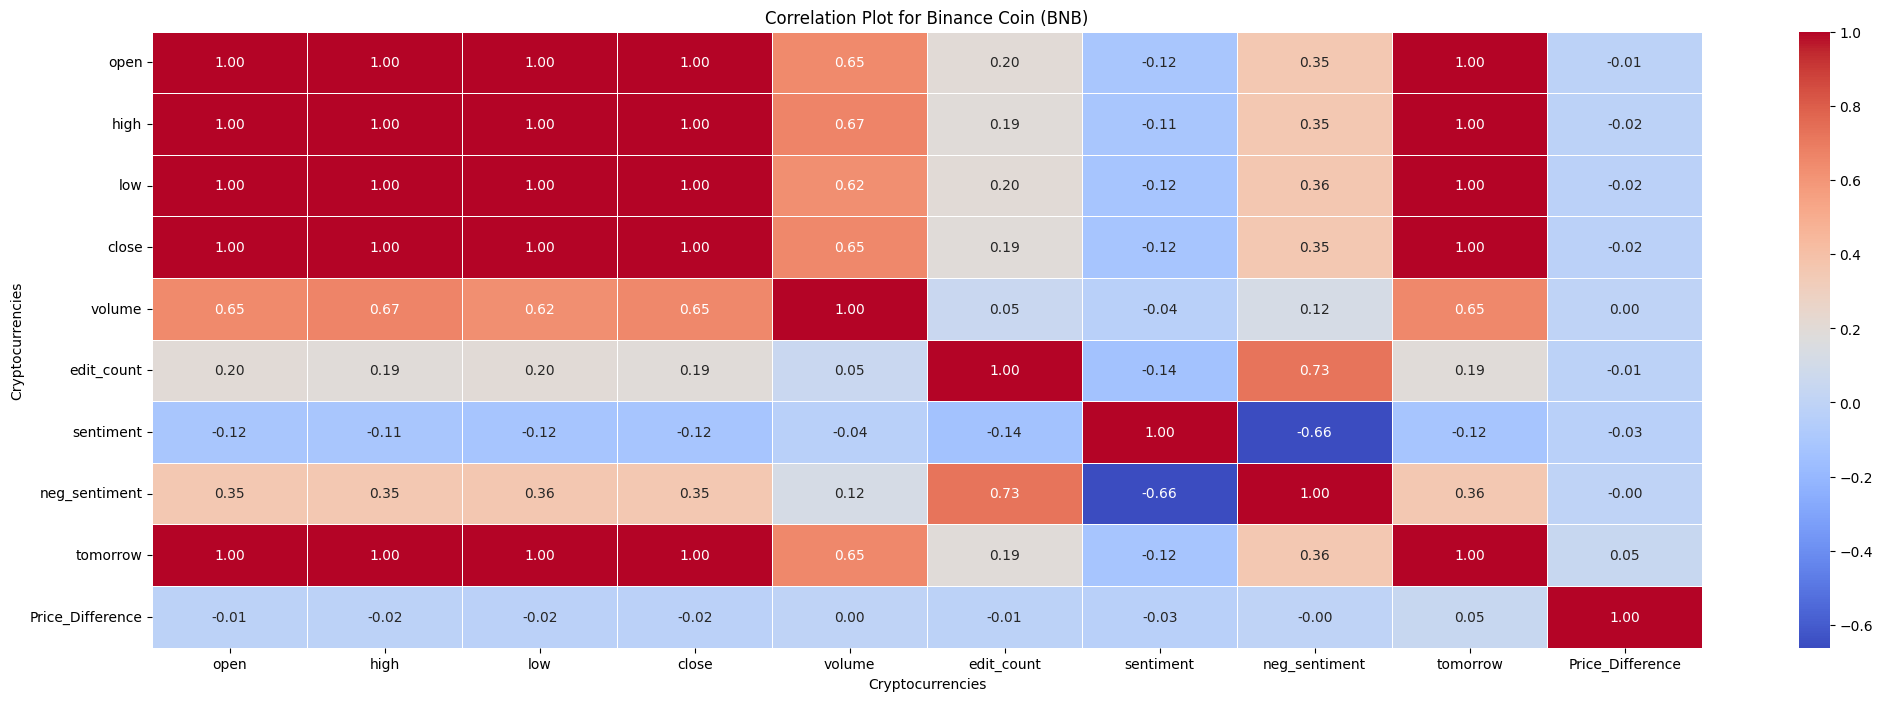

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate correlation matrix for Binance Coin (BNB)
correlation_matrix = bnb.corr()

# Plot correlation heatmap using Seaborn
plt.figure(figsize=(25,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot for Binance Coin (BNB)')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Cryptocurrencies')
plt.show()

In [ ]:
bnb['target'] = (bnb['tomorrow'] >bnb['close']).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb['target'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


target
1    1180
0    1095
Name: count, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=350, min_samples_split=50, random_state = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,Price_Difference,target
2018-01-29 00:00:00+00:00,13.545400,13.672700,12.677000,12.764500,71294304,0.266667,-0.122688,0.141667,11.250700,-1.513800,0
2018-01-30 00:00:00+00:00,12.773600,12.773600,11.057100,11.250700,59389600,0.133333,-0.133192,0.133333,11.145000,-0.105700,0
2018-01-31 00:00:00+00:00,11.268300,11.413200,10.568400,11.145000,50435000,0.133333,-0.133192,0.133333,9.515840,-1.629161,0
2018-02-01 00:00:00+00:00,11.178300,11.394400,8.707420,9.515840,82984200,0.133333,-0.133192,0.133333,9.652290,0.136451,1
2018-02-02 00:00:00+00:00,9.407960,10.458500,7.218130,9.652290,91468200,0.133333,-0.133192,0.133333,9.749680,0.097389,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17 00:00:00+00:00,537.831360,548.042847,514.112854,534.416016,1411927485,0.533333,0.136837,0.061111,552.172119,17.756104,1
2024-04-18 00:00:00+00:00,534.414978,555.040039,527.430054,552.172119,1439312699,0.500000,0.111899,0.061111,554.889282,2.717163,1
2024-04-19 00:00:00+00:00,552.172119,564.544861,525.028625,554.889282,1320094794,0.400000,0.144968,0.027778,570.960510,16.071228,1
2024-04-20 00:00:00+00:00,554.888123,574.098694,549.800049,570.960510,697007137,0.366667,0.117955,0.027778,574.604858,3.644348,1


In [ ]:
bnb = bnb.fillna(bnb.mean())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment',
       'neg_sentiment', 'tomorrow', 'Price_Difference', 'target'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


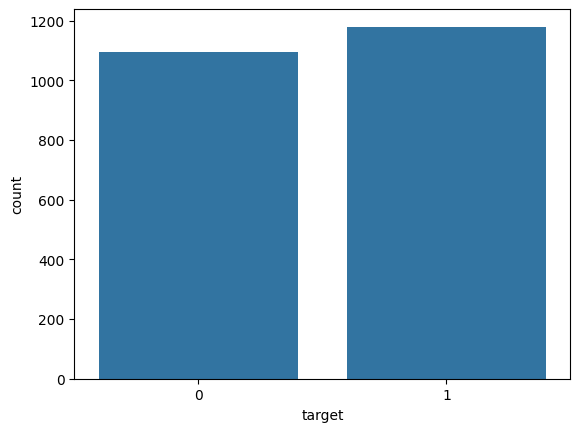

In [ ]:
# prompt: just want to visualization how many 0 and 1s are there

sns.countplot(x='target', data=bnb)
plt.show()


#SPLITTING THE DATA SET


In [ ]:
from sklearn.model_selection import train_test_split

X = bnb[['open', 'high', 'low', 'close', 'volume','edit_count','sentiment',	'neg_sentiment']]
y = bnb['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1820, 8) (1820,)
Testing set shape: (455, 8) (455,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Model Fitting

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bnb[['open', 'high', 'low', 'close', 'volume','edit_count','sentiment',	'neg_sentiment']], bnb['target'], test_size=0.25, random_state=1)

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=7)
# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)
# Make predictions on the test set
knn_pred = knn_model.predict(X_test)
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for KNN
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)

# Initialize Naive Bayes model
nb_model = GaussianNB()
# Fit the Naive Bayes model to the training data
nb_model.fit(X_train, y_train)
# Make predictions on the test set
nb_pred = nb_model.predict(X_test)
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for Naive Bayes
nb_mse = mean_squared_error(y_test, nb_pred)
nb_rmse = np.sqrt(nb_mse)

# Initialize AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=700, random_state=1)
# Fit the AdaBoost model to the training data
ada_model.fit(X_train, y_train)
# Make predictions on the test set
ada_pred = ada_model.predict(X_test)
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for AdaBoost
ada_mse = mean_squared_error(y_test, ada_pred)
ada_rmse = np.sqrt(ada_mse)

print("Mean Squared Error (MSE) for KNN:", knn_mse)
print("Root Mean Squared Error (RMSE) for KNN:", knn_rmse)
print("Mean Squared Error (MSE) for Naive Bayes:", nb_mse)
print("Root Mean Squared Error (RMSE) for Naive Bayes:", nb_rmse)
print("Mean Squared Error (MSE) for AdaBoost:", ada_mse)
print("Root Mean Squared Error (RMSE) for AdaBoost:", ada_rmse)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error (MSE) for KNN: 0.5272407732864675
Root Mean Squared Error (RMSE) for KNN: 0.7261134713572441
Mean Squared Error (MSE) for Naive Bayes: 0.492091388400703
Root Mean Squared Error (RMSE) for Naive Bayes: 0.7014922582614173
Mean Squared Error (MSE) for AdaBoost: 0.5149384885764499
Root Mean Squared Error (RMSE) for AdaBoost: 0.7175921464010387


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(bnb[['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']], bnb['target'], test_size=0.35, random_state=1)
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)


rf_model = RandomForestClassifier(n_estimators=250, random_state=1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
lr_model = LogisticRegression(max_iter=1500, random_state=1)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)

print("Mean Squared Error (MSE) for Decision Tree:", dt_mse)
print("Root Mean Squared Error (RMSE) for Decision Tree:", dt_rmse)
print("Mean Squared Error (MSE) for Random Forest:", rf_mse)
print("Root Mean Squared Error (RMSE) for Random Forest:", rf_rmse)
print("Mean Squared Error (MSE) for Logistic Regression:", lr_mse)
print("Root Mean Squared Error (RMSE) for Logistic Regression:", lr_rmse)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error (MSE) for Decision Tree: 0.533249686323714
Root Mean Squared Error (RMSE) for Decision Tree: 0.7302394719020014
Mean Squared Error (MSE) for Random Forest: 0.5282308657465495
Root Mean Squared Error (RMSE) for Random Forest: 0.7267949268855346
Mean Squared Error (MSE) for Logistic Regression: 0.46925972396486826
Root Mean Squared Error (RMSE) for Logistic Regression: 0.6850253454908571


In [ ]:

from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(bnb[['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']], bnb['target'], test_size=0.45, random_state=99)


xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)

print("Mean Squared Error (MSE) for XGBoost:", xgb_mse)
print("Root Mean Squared Error (RMSE) for XGBoost:", xgb_rmse)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error (MSE) for XGBoost: 0.515625
Root Mean Squared Error (RMSE) for XGBoost: 0.7180703308172536


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Assuming 'bnb' is your DataFrame containing the data

# Drop rows with NaN values in both features and target
bnb.dropna(subset=['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment', 'target'], inplace=True)

# Define the features
X = bnb[['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']]

# Define the target variable
y = bnb['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(59, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(46, activation='relu'),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='RMSprop', loss='binary_crossentropy')

# Train the neural network
model.fit(X_train, y_train, epochs=350, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE) for ANN:", mse)
print("Root Mean Squared Error (RMSE) for ANN:", rmse)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/350
47/47 [==============================] - 1s 3ms/step - loss: 846844.8125
Epoch 2/350
47/47 [==============================] - 0s 2ms/step - loss: 224892.4688
Epoch 3/350
47/47 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 4/350
47/47 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 5/350
47/47 [==============================] - 0s 3ms/step - loss: 0.6930
Epoch 6/350
47/47 [==============================] - 0s 2ms/step - loss: 0.6930
Epoch 7/350
47/47 [==============================] - 0s 3ms/step - loss: 0.6930
Epoch 8/350
47/47 [==============================] - 0s 3ms/step - loss: 0.6930
Epoch 9/350
47/47 [==============================] - 0s 2ms/step - loss: 0.6930
Epoch 10/350
47/47 [==============================] - 0s 2ms/step - loss: 0.6930
Epoch 11/350
47/47 [==============================] - 0s 2ms/step - loss: 0.6929
Epoch 12/350
47/47 [==============================] - 0s 2ms/step - loss: 0.6929
Epoch 13/350
47/47 [=======

bnb

In [ ]:
train = bnb.iloc[:200]
test= bnb[-200:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predictors = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
model = KNeighborsClassifier()

# Train the KNN model
model.fit(train[predictors],train['target'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNeighborsClassifier()

#Back testing

In [ ]:
def predict(train, test, predictors, model):


  model.fit(train[predictors], train["target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="predictions")
  combined = pd.concat([test['target'],preds],axis=1)
  return combined

def backtest(data, model, predictors, start=1095, step=150):


  all_predictions = []
  for i in range(start, len(data), step):
    preds = predict(data[:i], data[i:i + step], predictors, model)
    all_predictions.append(preds)

  return pd.concat(all_predictions, axis=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=1, learning_rate= .1,n_estimators=200)
predictions = backtest(bnb,model,predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def compute_rolling(bnb):
    horizons = [2, 7, 60, 365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]
    for horizon in horizons:
        rolling_averages = bnb.rolling(horizon, min_periods=1).mean()
        ratio_column = f"close_ratio_{horizon}"
        bnb[ratio_column] = bnb["close"] / rolling_averages["close"]
        edit_column = f"edit_{horizon}"
        bnb[edit_column] = rolling_averages["edit_count"]
        rolling = bnb.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        bnb[trend_column] = rolling["target"]
        new_predictors += [ratio_column, trend_column, edit_column]
    return bnb, new_predictors

# Usage example:
bnb, new_predictors = compute_rolling(bnb)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb,new_predictors = compute_rolling(bnb.copy())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bnb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,Price_Difference,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2018-01-29 00:00:00+00:00,13.545400,13.672700,12.677000,12.764500,71294304,0.266667,-0.122688,0.141667,11.250700,-1.513800,...,NaN,1.000000,0.266667,NaN,1.000000,0.266667,NaN,1.000000,0.266667,NaN
2018-01-30 00:00:00+00:00,12.773600,12.773600,11.057100,11.250700,59389600,0.133333,-0.133192,0.133333,11.145000,-0.105700,...,0.0,0.936965,0.200000,0.000000,0.936965,0.200000,0.000000,0.936965,0.200000,0.000000
2018-01-31 00:00:00+00:00,11.268300,11.413200,10.568400,11.145000,50435000,0.133333,-0.133192,0.133333,9.515840,-1.629161,...,0.0,0.950933,0.177778,0.000000,0.950933,0.177778,0.000000,0.950933,0.177778,0.000000
2018-02-01 00:00:00+00:00,11.178300,11.394400,8.707420,9.515840,82984200,0.133333,-0.133192,0.133333,9.652290,0.136451,...,0.0,0.851986,0.166667,0.000000,0.851986,0.166667,0.000000,0.851986,0.166667,0.000000
2018-02-02 00:00:00+00:00,9.407960,10.458500,7.218130,9.652290,91468200,0.133333,-0.133192,0.133333,9.749680,0.097389,...,0.5,0.888329,0.160000,0.250000,0.888329,0.160000,0.250000,0.888329,0.160000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17 00:00:00+00:00,537.831360,548.042847,514.112854,534.416016,1411927485,0.533333,0.136837,0.061111,552.172119,17.756104,...,0.0,0.947567,0.495238,0.142857,1.039511,0.440000,0.550000,1.772158,0.369132,0.523288
2024-04-18 00:00:00+00:00,534.414978,555.040039,527.430054,552.172119,1439312699,0.500000,0.111899,0.061111,554.889282,2.717163,...,0.5,0.992302,0.500000,0.285714,1.067045,0.446111,0.566667,1.827229,0.369406,0.526027
2024-04-19 00:00:00+00:00,552.172119,564.544861,525.028625,554.889282,1320094794,0.400000,0.144968,0.027778,570.960510,16.071228,...,1.0,1.007921,0.490476,0.428571,1.065327,0.450000,0.566667,1.832284,0.369498,0.528767
2024-04-20 00:00:00+00:00,554.888123,574.098694,549.800049,570.960510,697007137,0.366667,0.117955,0.027778,574.604858,3.644348,...,1.0,1.032649,0.476190,0.571429,1.088655,0.452778,0.566667,1.881110,0.369589,0.528767


In [ ]:
predictions = backtest(bnb,model,new_predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,predictions
2021-01-28 00:00:00+00:00,1,0
2021-01-29 00:00:00+00:00,1,0
2021-01-30 00:00:00+00:00,0,0
2021-01-31 00:00:00+00:00,1,1
2021-02-01 00:00:00+00:00,0,0
...,...,...
2024-04-17 00:00:00+00:00,1,0
2024-04-18 00:00:00+00:00,1,0
2024-04-19 00:00:00+00:00,1,0
2024-04-20 00:00:00+00:00,1,0


In [ ]:
bnb = bnb.fillna(bnb.mean())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train = bnb.iloc[:200]
test = bnb[-100:]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def predict(train, test, predictors, model):


  model.fit(train[predictors], train["target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="predictions")
  combined = pd.concat([test['target'],preds],axis=1)
  return combined

def backtest(data, model, predictors, start=1095, step=150):


  all_predictions = []
  for i in range(start, len(data), step):
    preds = predict(data[:i], data[i:i + step], predictors, model)
    all_predictions.append(preds)

  return pd.concat(all_predictions, axis=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def compute_rolling(bnb):
    horizons = [2, 7, 60, 365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]
    for horizon in horizons:
        rolling_averages = bnb.rolling(horizon, min_periods=1).mean()
        ratio_column = f"close_ratio_{horizon}"
        bnb[ratio_column] = bnb["close"] / rolling_averages["close"]
        edit_column = f"edit_{horizon}"
        bnb[edit_column] = rolling_averages["edit_count"]
        rolling = bnb.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        bnb[trend_column] = rolling["target"]
        new_predictors += [ratio_column, trend_column, edit_column]
    return bnb, new_predictors

# Usage example:
bnb, new_predictors = compute_rolling(bnb)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()
ada_model = AdaBoostClassifier(n_estimators=50, random_state=1)

# Assuming you have defined 'predictors' and 'bnb' dataset previously
knn_predictions = backtest(bnb, knn_model, predictors)
nb_predictions = backtest(bnb, nb_model, predictors)
ada_predictions = backtest(bnb, ada_model, predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming 'actual_values' contains the actual target values
actual_values = predictions['target']

# Assuming 'predicted_values' contains the predicted values
predicted_values = predictions['predictions']

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_values)


# Calculate MSE for KNN predictions
mse_knn = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error of KNN model:", mse_knn)

Mean Squared Error of KNN model: 0.4915254237288136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train = bnb.iloc[:300]  # Create a training set with the first 300 rows
test = bnb[-150:]  # Create a testing set with the last 150 rows


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def predict(train, test, predictors, model):


  model.fit(train[predictors], train["target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="predictions")
  combined = pd.concat([test['target'],preds],axis=1)
  return combined

def backtest(data, model, predictors, start=2095, step=250):


  all_predictions = []
  for i in range(start, len(data), step):
    preds = predict(data[:i], data[i:i + step], predictors, model)
    all_predictions.append(preds)

  return pd.concat(all_predictions, axis=0)
def compute_rolling(bnb):
    horizons = [2, 7, 60, 365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]
    for horizon in horizons:
        rolling_averages = bnb.rolling(horizon, min_periods=1).mean()
        ratio_column = f"close_ratio_{horizon}"
        bnb[ratio_column] = bnb["close"] / rolling_averages["close"]
        edit_column = f"edit_{horizon}"
        bnb[edit_column] = rolling_averages["edit_count"]
        rolling = bnb.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        bnb[trend_column] = rolling["target"]
        new_predictors += [ratio_column, trend_column, edit_column]
    return bnb, new_predictors

# Usage example:
bnb, new_predictors = compute_rolling(bnb)
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_predictions = backtest(bnb, nb_model, predictors)
from sklearn.metrics import mean_squared_error

# Assuming 'actual_values' contains the actual target values
actual_values = predictions['target']

# Assuming 'predicted_values' contains the predicted values
predicted_values = predictions['predictions']

# Calculate MSE
mse_nb = mean_squared_error(actual_values, predicted_values)


# Calculate MSE for KNN predictions
mse_knn = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error of nb model:", mse_nb)
rmse = np.sqrt(mse)

print("Root Mean Squared Error of nb model:", rmse)

Mean Squared Error of nb model: 0.4915254237288136
Root Mean Squared Error of nb model: 0.7010887416930995


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train = bnb.iloc[:200]
test = bnb[-100:]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test['target'], preds], axis=1)
    return combined

def backtest(data, model, predictors, start=2095, step=250):
    all_predictions = []
    for i in range(start, len(data), step):
        preds = predict(data[:i], data[i:i + step], predictors, model)
        all_predictions.append(preds)
    return pd.concat(all_predictions, axis=0)

bnb, new_predictors = compute_rolling(bnb)
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_predictions = backtest(bnb, ada_model, predictors)

from sklearn.metrics import mean_squared_error

# Assuming 'actual_values' contains the actual target values
actual_values = ada_predictions['target']

# Assuming 'predicted_values' contains the predicted values
predicted_values = ada_predictions['predictions']

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_values)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Mean Squared Error of AdaBoost model:", mse)
print("Root Mean Squared Error of AdaBoost model:", rmse)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error of AdaBoost model: 0.46111111111111114
Root Mean Squared Error of AdaBoost model: 0.6790516262487788


In [ ]:
knn_predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,predictions
2021-01-28 00:00:00+00:00,1,1
2021-01-29 00:00:00+00:00,1,1
2021-01-30 00:00:00+00:00,0,1
2021-01-31 00:00:00+00:00,1,0
2021-02-01 00:00:00+00:00,0,0
...,...,...
2024-04-17 00:00:00+00:00,1,0
2024-04-18 00:00:00+00:00,1,1
2024-04-19 00:00:00+00:00,1,1
2024-04-20 00:00:00+00:00,1,1


In [ ]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 2500x9000 with 0 Axes>

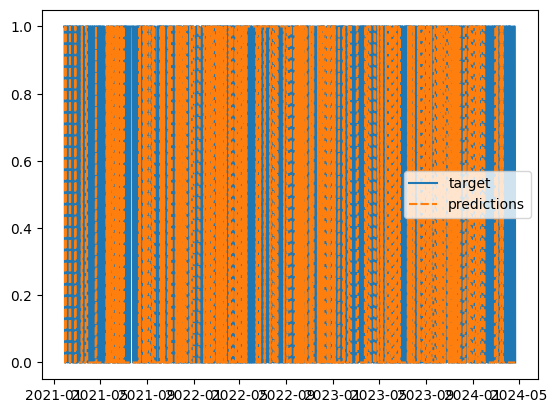

<Figure size 2500x9000 with 0 Axes>

In [ ]:
sns.lineplot(predictions)
plt.figure(figsize=(25, 90))